In [7]:
import sys

import numpy as np

import matplotlib.pyplot as plt
import datetime
import time
import os

sys.path.append('../src')
import connectfour as c4

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
def f_theta(board: np.ndarray) -> (float, np.ndarray):
    """random evaluator"""
    alpha = 1
    return 0, np.random.dirichlet(alpha * np.array([1,1,1,1,1,1,1]))

def f_test(board: np.ndarray) -> (np.float, np.ndarray):
    return 0, np.ones(7)/7

eval_test = c4.evaluate.Evaluator(f_test, name='test')

In [12]:
# generate AlphaZero player
player = c4.player.AzPlayer(evaluator=eval_test)

In [50]:
evaluator = c4.pvnet.PolicyValueNet()
player = c4.player.AzPlayer(evaluator)
player.self_play()

build_model
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 6, 7, 1)]    0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 6, 7, 128)    1280        ['input_7[0][0]']                
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 6, 7, 128)   512         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_5 (Activation)      (None, 6, 7, 128)    0           ['batch_normali

2022-03-08 22:27:13.715283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [48]:
tensor = tf.convert_to_tensor([[1,2,3,4,5]], dtype=float)

In [49]:
model.predict(tensor)

2022-03-08 22:26:53.045755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[7.5049725]], dtype=float32)

# impact of number of simulations to self-play time, and game length

In [ ]:
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
config = c4.selfplay.SelfPlayConfig(evaluator, n_sims=400, tau=.03)
c4.selfplay.self_play_stats(config=config, n_games=100, verbose=True, 
                            log_path='../logs/', 
                            train_data_path='../data/')


In [ ]:
c4.viz.compare_players()

# A proxy for player performance
A proxy for how good the player is is to see how much moves on average does it take for it to win in a self-play game.  
Given the element of randomness provided by the move selection process, this is best captured by looking at the cdf over a sample of self-played games (here 100).
## Influence of n_sims:

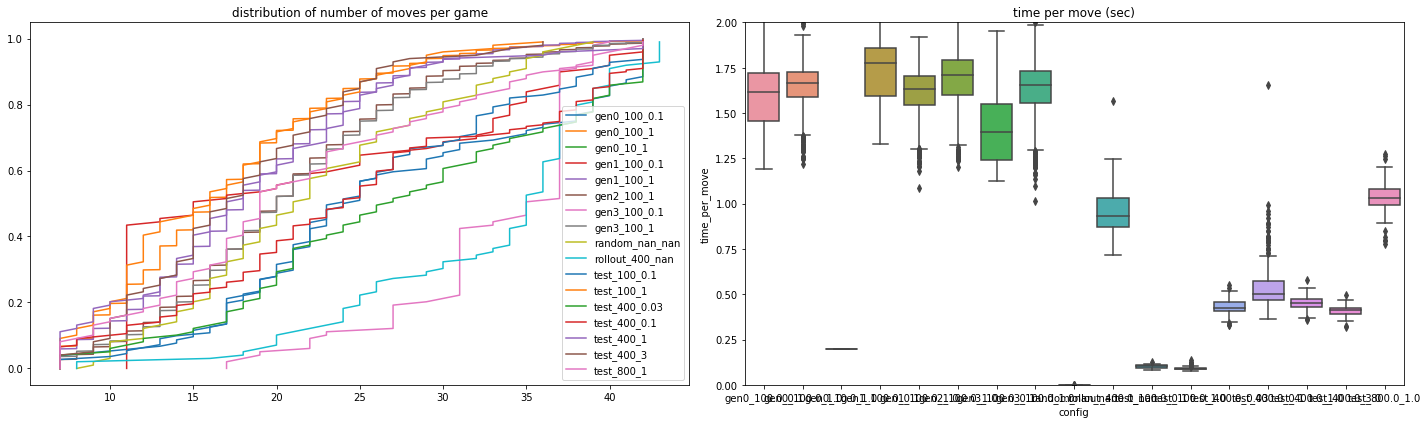

In [347]:
c4.viz.compare_players()

### Comparing AzPlayers to Random, and rollout-based MCTS

In [348]:
p4.viz.summary_stats()

,game_length,time_per_move
config,,
gen3_100.0_0.1,32.676768,1.393484
rollout_400.0_nan,32.282828,0.929429
test_400.0_0.03,27.070707,0.423909
gen0_100.0_0.1,26.278846,1.614056
test_100.0_0.1,25.189189,0.103528
test_400.0_0.1,24.809045,0.503595
random_nan_nan,21.949495,0.000200
gen1_100.0_0.1,21.181818,1.775818
test_800.0_1.0,21.090909,1.031200


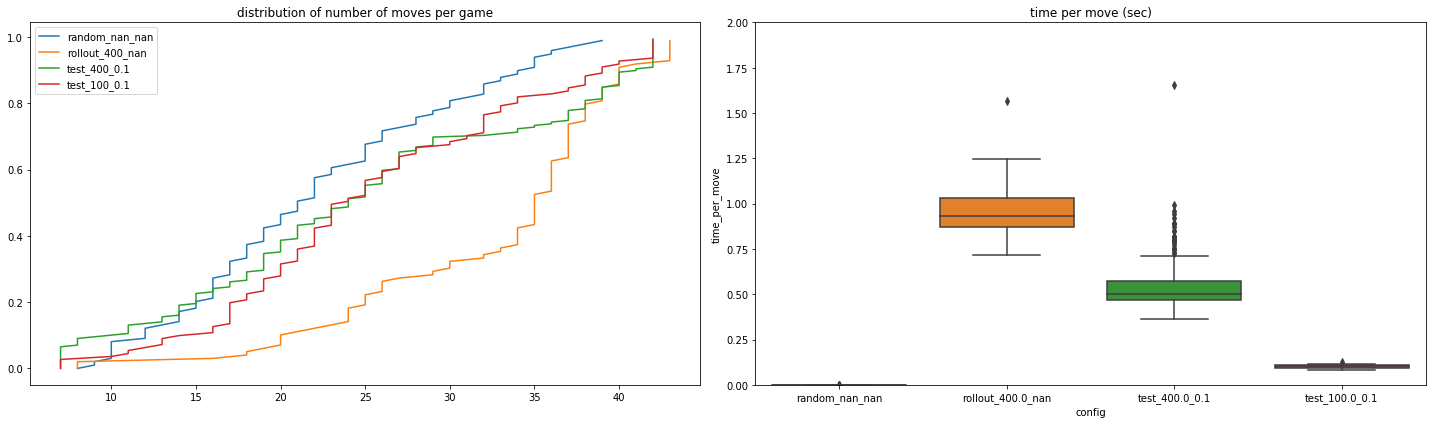

In [104]:
# comparing AzPlayer
configs = ["random_NA_NA", "rollout_400_NA", "test_400_01", "test_100_01"]   
p4.viz.compare_players(config_list=configs)

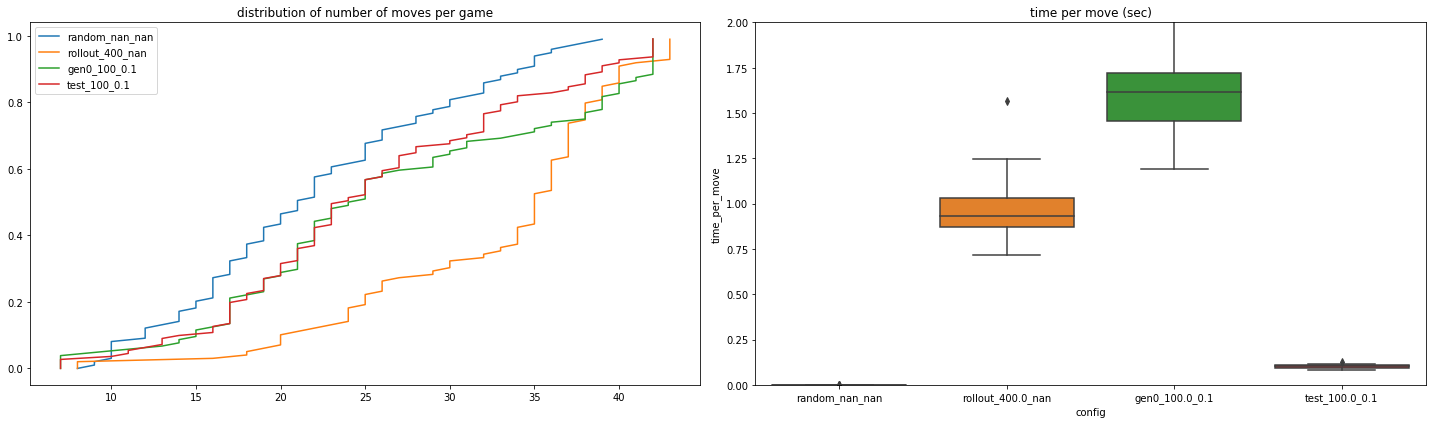

In [97]:
# comparing AzPlayer
configs = ["random_NA_NA", "rollout_400_NA", "gen0_100_01", "test_100_01"]   
p4.viz.compare_players(config_list=configs)

### influence of increasing $n_{sims}$

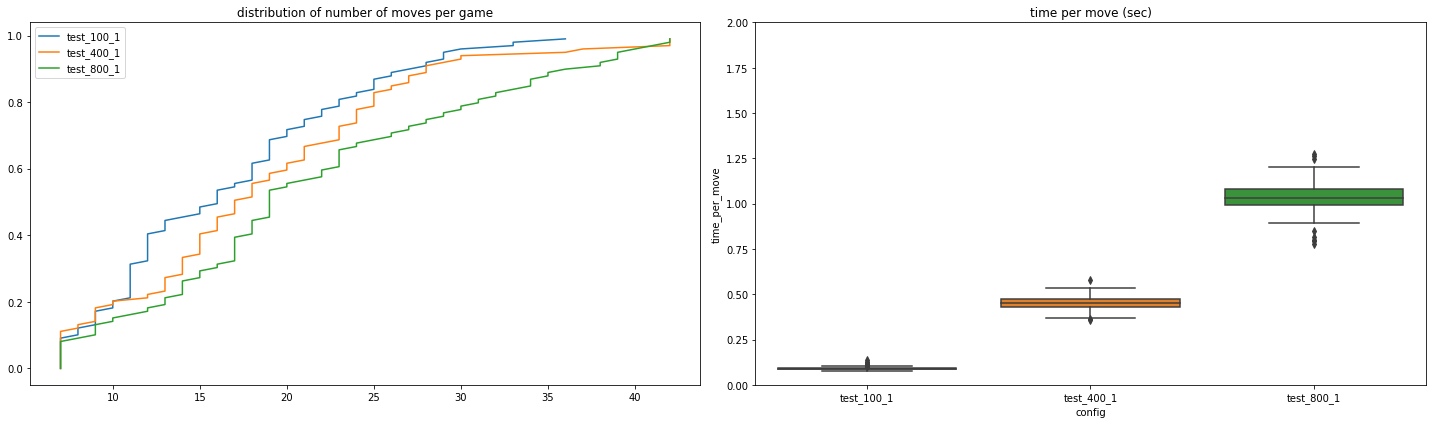

In [2]:
p4.viz.compare_players(config_list=["test_100_1", "test_400_1", "test_800_1"])

delta might be even higher with lower tau
### influence of decreasing $\tau$ on game length distribution:

In [399]:
pvn = p4.pvnet.PolicyValueNet(quiet=True, filename="models/gen3.h5")
evaluator = p4.evaluate.Evaluator(pvn=pvn)

build_model
To see model details, enter:
	>>> <pvn>.summary()


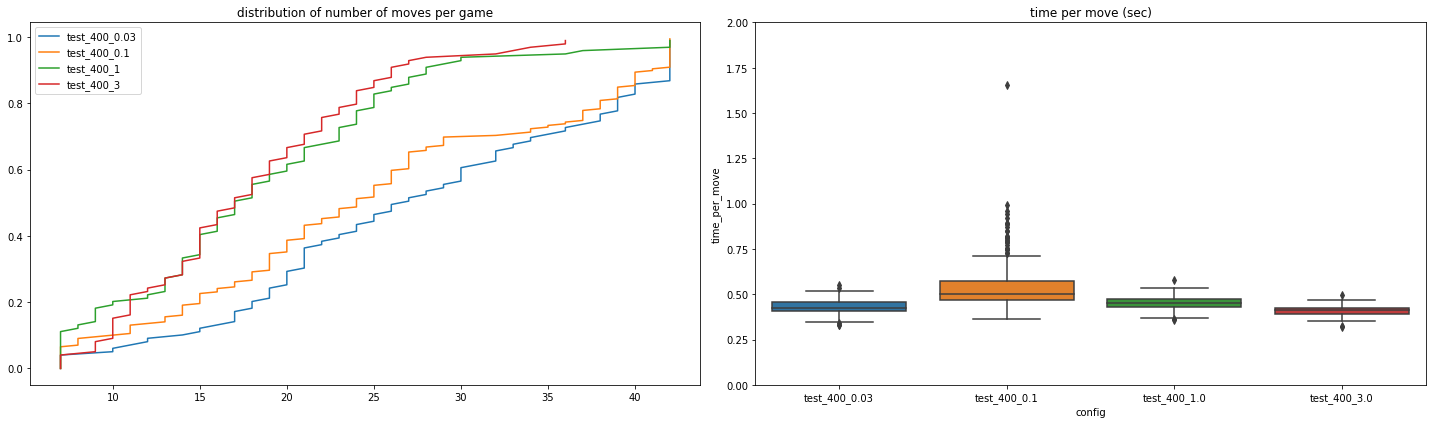

In [13]:
configs = ["test_400_003", "test_400_01", "test_400_1", "test_400_3"]   
p4.viz.compare_players(configs)

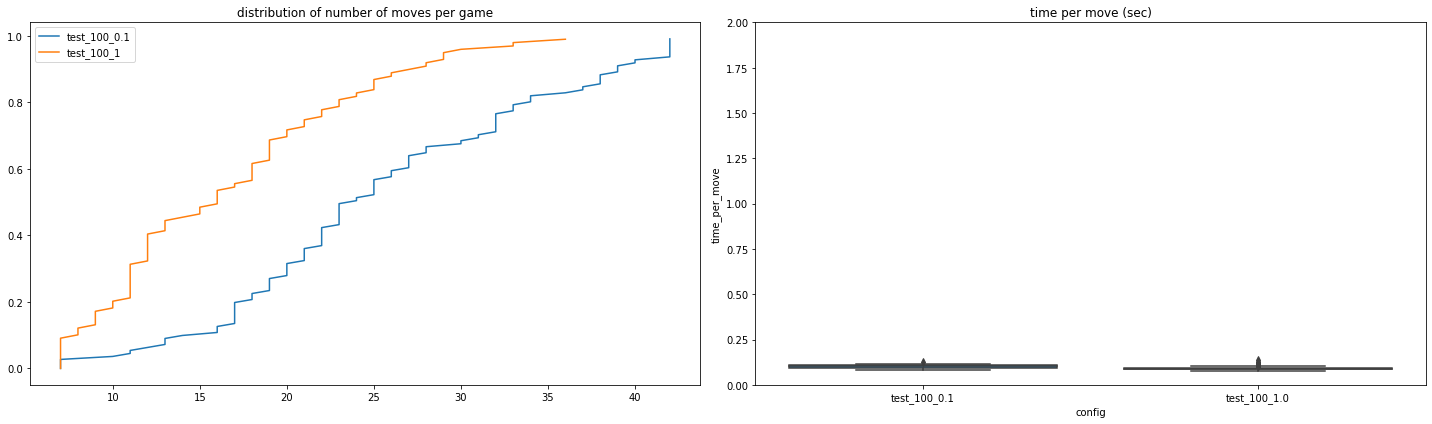

In [275]:
configs = ["test_100_01", "test_100_1"]   
p4.viz.compare_players(configs)

In [582]:
p4.viz.summary_stats()

,game_length,time_per_move
config,,
gen9_400.0_1-10-01,36.515213,4.953450
gen7_100.0_01-10-01,35.131313,1.682405
gen9_100.0_1-10-01,35.071884,1.290886
gen8_400.0_1-10-01,34.928929,1.805906
gen3_100.0_0.1,32.676768,1.393484
rollout_400.0_nan,32.282828,0.929429
gen7_100.0_1-10-01,31.259259,1.446296
gen6_100.0_1-10-01,30.857858,1.477150
gen5_100.0_1-10-01,30.315315,1.506121


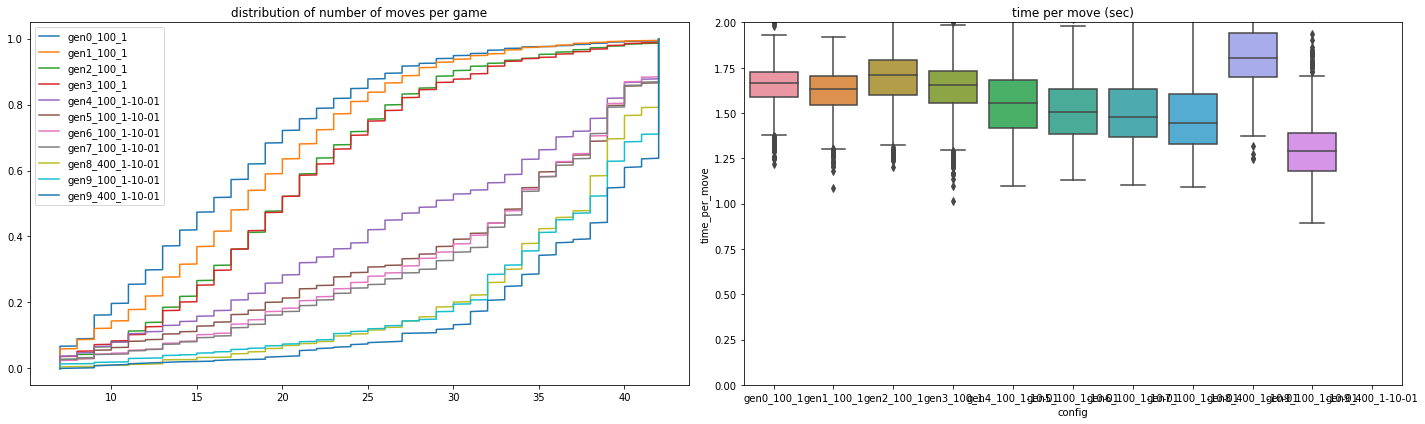

In [583]:
configs = ["gen0_100_1", "gen1_100_1", "gen2_100_1", "gen3_100_1", "gen4_100_1-10-01", "gen5_100_1-10-01", "gen6_100_1-10-01", "gen7_100_1-10-01","gen8_400_1-10-01", "gen9_100_1-10-01", "gen9_400_1-10-01"]   # "gen3_100_01",
p4.viz.compare_players(configs)


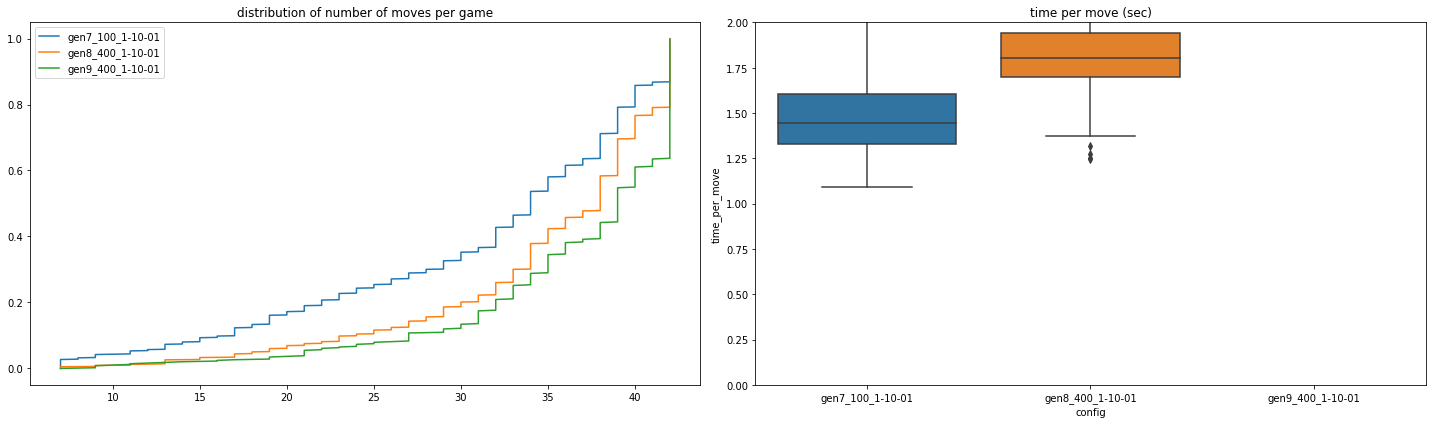

In [581]:
configs = ["gen7_100_1-10-01", "gen8_400_1-10-01", "gen9_400_1-10-01"]  
p4.viz.compare_players(configs)


### create similar simulations for rollout and random strategies

In [163]:
from mctspy.tree.nodes import TwoPlayersGameMonteCarloTreeSearchNode
from mctspy.tree.search import MonteCarloTreeSearch

def rollout_self_play(strat, n_games=20, verbose=True):
    """compares 2 strategies by playing them against each other for a given number of games and recording number of wins per player."""
    games_length = []
    timer = []
    start = time.time()
    for i in range(n_games):
        # initialize game
        starting_player = 1 - 2 * (i % 2)
        initial_board_state = ConnectFourGameState(board=np.zeros((6,7)), next_to_move=starting_player)
        node = TwoPlayersGameMonteCarloTreeSearchNode(state = initial_board_state)
        game_length = 1

        # play game
        st = time.time()
        while not node.state.is_game_over():
            node = strat(node)
            game_length +=1
       
        timer.append(time.time()-st)
        games_length.append(game_length)
        
        if ((i+1) % 10 == 0) & verbose:
            # create string in format "HH:MM:SS"
            time_since_start = str(datetime.timedelta(seconds=int(time.time() - start)))
            print(f"{time_since_start} | {i+1} games performed")

    return np.array(timer), np.array(games_length)

# standard MCTS performance
classic_mcts = lambda node: MonteCarloTreeSearch(node).best_action(400)
%time c400 = rollout_self_play(classic_mcts, n_games=100)

def random_play(node) -> TwoPlayersGameMonteCarloTreeSearchNode:
    action = np.random.choice(node.state.get_legal_actions())
    next_state = node.state.move(action)
    return TwoPlayersGameMonteCarloTreeSearchNode(next_state)
%time rand0 = rollout_self_play(random_play, n_games=100)

0:05:22 | 10 games performed
0:10:14 | 20 games performed
0:15:31 | 30 games performed
0:20:42 | 40 games performed
0:25:53 | 50 games performed
0:30:56 | 60 games performed
0:35:11 | 70 games performed
0:40:13 | 80 games performed
0:45:26 | 90 games performed
0:50:07 | 100 games performed
CPU times: user 49min 20s, sys: 18.9 s, total: 49min 39s
Wall time: 50min 7s


(array([30.31146789, 31.31741691, 30.75385499, 32.12014198, 35.3252461 ,
        36.990309  , 37.52666593, 35.19808912, 21.85456586, 31.53197575,
        33.82386303, 34.93901324, 20.66289091, 31.85424089,  8.261024  ,
        29.96703386, 38.29754901, 29.49239421, 29.53824472, 34.98970509,
        38.35113287, 24.91618586, 22.56989622, 34.41997099, 39.8822248 ,
        34.59462976, 28.23518682, 40.49037504, 26.77094817, 26.21101427,
        39.3556881 , 36.67409873, 29.26516724, 22.4279201 , 21.18131804,
        20.27712512, 29.72490287, 41.21574593, 44.80047894, 26.39310217,
        32.51150489, 33.70282912, 39.32019997, 31.97357583, 24.76179886,
        26.81156206, 34.53893685, 31.30204582, 25.15133023, 31.00098681,
        31.68835878, 36.41246486, 30.11363101, 30.71694398, 32.65743804,
        29.21465397, 30.04619217, 15.51306701, 32.20429111, 33.90961218,
         8.17174983, 35.49345303, 29.37951207, 28.56823921, 22.76368093,
        28.71811295, 22.61989617, 22.925174  , 27.7

**Next steps**:
- player evaluation:
    - implement a node_after_ opponent_move -> allows to get node to start from after another player plays her move.
        - this allows to play against opponent, without losing benefits of keeping existing search tree.
    - reimplement compare_players to avoid sharing Search Trees across players.
    - compare AzPlayers based on number of sims run (100 vs 400)
- [x] neural network evaluator:
    - [x] build a simple resnet outputting a position value (tanh activation), and a softmax
    - [x] create custom loss function
    - [x] instantiate and measure impact on playing speed
- write training cycle:
     - [x] instantiate nn(gen0)
`for gen in 1..X:
   - player.self_play (evaluator = nn(gen_i))
   - train nn(gen_i+1) on historical plays`
     - [x] need a data sampler / loader
     - 
     

# Neural Network Model

In [50]:
reload(p4.pv_net)
reload(p4.evaluate)
pvn = p4.pv_net.PolicyValueNet(quiet=True)
gen1 = p4.evaluate.Evaluator(pvn=pvn, name='gen1')

build_model
To see model details, enter:
	>>> <pvn>.summary()


In [33]:
p,v = gen1.evaluate_state(state)

In [35]:
gen0.pvn.save_model('models/gen0')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/gen0/assets


In [338]:
gen1.pvn.model.fit(train_dataset, epochs=1, steps_per_epoch=1)

Train for 1 steps
1/1 [==============================] - 0s 283ms/step - loss: 2.2271 - dense_9_loss: 1.5917 - dense_11_loss: 0.4500


In [105]:
config = p4.selfplay.SelfPlayConfig(n_sims=100, tau=1, evaluator=gen0)
p4.selfplay.self_play_stats(config=config, n_games=100, verbose=True)

STARTING SELF-PLAY:
SELF-PLAY COMPLETED. LOGS AVAILABLE AT:
logs/gen0_100_1.log
TRAINING DATA SAVED IN:
data/gen0_100_1.pkl


In [4]:
config = p4.selfplay.SelfPlayConfig(n_sims=100, tau=1, evaluator=gen0)
%time p4.selfplay.self_play_stats(config=config, n_games=1, verbose=True)

STARTING SELF-PLAY:
SELF-PLAY COMPLETED. LOGS AVAILABLE AT:
logs/gen0_100_1.log
TRAINING DATA SAVED IN:
data/gen0_100_1.pkl
CPU times: user 30.3 s, sys: 1.11 s, total: 31.4 s
Wall time: 28.8 s


# Training Pipeline
- [x] load historical data from past X history
- [x] reformat into single 6x7xn matrix
- [x] perform augmentation (symmetry ): np.fliplr
- [x] consolidate identical positions (average value, average policy)
- [x] create tensorflow dataset (see MTL pipeline)
- [x] sample 60k examples to train with
- [x] setup training code
- [ ] define callback to save checkpoints
- [x] save trained model

In [567]:
# creates a training dataset based on the self-play generated data from the last n_gens generations. operates sampling and dataset repetition based on a desired number of training steps
train_dataset = p4.train.get_training_dataset(next_gen=10, 
                                              n_gens=4, 
                                              batch_size=64, 
                                              desired_steps=500)

loaded 63,839 unique historical board positions from the past 4 generations
returning 500 batches of size 64


In [257]:
train_dataset.cache()
hist = gen1.pvn.model.fit(train_dataset)

Train for 500 steps
500/500 [==============================] - 23s 46ms/step - loss: 2.3654 - dense_9_loss: 1.6904 - dense_11_loss: 0.4907


## All-round load - train - save cycle
- loads previous generation pvn
- train on historical games from past n_gens generations
- save trained pvn weights

last step:
- [ ] automatically identify new generation name (based on logs)
- [ ] string evaluator training / self-play together to achieve ideal performance

In [404]:
# train the latest generation of evaluator on n_gens generations of historical data, transform trainnig data to perform 5,000 steps of training and save weights after training into gen{next_gen}
hist, pvn = p4.train.load_train_save(next_gen=4, steps=10000, n_gens=4)

build_model
To see model details, enter:
	>>> <pvn>.summary()
loaded 113,984 unique historical board positions from the past 4 generations
returning 10,000 batches of size 64
Train for 10000 steps
10000/10000 [==============================] - 549s 55ms/step - loss: 2.2920 - policy_head_loss: 1.5954 - value_head_loss: 0.5070
model weights saved in models/gen4.h5


In [469]:
# train the latest generation of evaluator on n_gens generations of historical data, transform trainnig data to perform 5,000 steps of training and save weights after training into gen{next_gen}
hist, pvn = p4.train.load_train_save(next_gen=5, steps=10000, n_gens=4)

build_model
To see model details, enter:
	>>> <pvn>.summary()
loaded 127,563 unique historical board positions from the past 4 generations
returning 10,000 batches of size 64
Train for 10000 steps
10000/10000 [==============================] - 606s 61ms/step - loss: 2.0723 - policy_head_loss: 1.4066 - value_head_loss: 0.4683
model weights saved in models/gen5.h5


In [481]:
# train the latest generation of evaluator on n_gens generations of historical data, transform trainnig data to perform 5,000 steps of training and save weights after training into gen{next_gen}
hist, pvn = p4.train.load_train_save(next_gen=6, steps=10000, n_gens=4)
hist

build_model
To see model details, enter:
	>>> <pvn>.summary()
loaded 145,234 unique historical board positions from the past 4 generations
returning 10,000 batches of size 64
Train for 10000 steps
10000/10000 [==============================] - 483s 48ms/step - loss: 1.7991 - policy_head_loss: 1.1861 - value_head_loss: 0.4117
model weights saved in models/gen6.h5


{'loss': [1.7991177487492562],
 'policy_head_loss': [1.1861067],
 'value_head_loss': [0.41165453]}

In [491]:
# train the latest generation of evaluator on n_gens generations of historical data, transform trainnig data to perform 5,000 steps of training and save weights after training into gen{next_gen}
hist, pvn = p4.train.load_train_save(next_gen=7, steps=10000, n_gens=5)
hist

build_model
To see model details, enter:
	>>> <pvn>.summary()
loaded 188,770 unique historical board positions from the past 5 generations
returning 10,000 batches of size 64
Train for 10000 steps
10000/10000 [==============================] - 467s 47ms/step - loss: 1.7001 - policy_head_loss: 1.0879 - value_head_loss: 0.4100
model weights saved in models/gen7.h5


{'loss': [1.7000641399502754],
 'policy_head_loss': [1.0879289],
 'value_head_loss': [0.41001743]}

In [500]:
# train the latest generation of evaluator on n_gens generations of historical data, transform trainnig data to perform 5,000 steps of training and save weights after training into gen{next_gen}
hist, pvn = p4.train.load_train_save(next_gen=8, steps=10000, n_gens=5)
hist

build_model
To see model details, enter:
	>>> <pvn>.summary()
loaded 203,440 unique historical board positions from the past 5 generations
returning 10,000 batches of size 64
Train for 10000 steps
10000/10000 [==============================] - 506s 51ms/step - loss: 1.5075 - policy_head_loss: 0.9266 - value_head_loss: 0.3800
model weights saved in models/gen8.h5


{'loss': [1.5075070424556731],
 'policy_head_loss': [0.9265906],
 'value_head_loss': [0.37995085]}

In [546]:
# train the latest generation of evaluator on n_gens generations of historical data, transform trainnig data to perform 5,000 steps of training and save weights after training into gen{next_gen}
hist, pvn = p4.train.load_train_save(next_gen=9, steps=10000, n_gens=6)
hist

build_model
To see model details, enter:
	>>> <pvn>.summary()
loaded 23,076 unique historical board positions from the past 6 generations
returning 10,000 batches of size 64
Train for 10000 steps
10000/10000 [==============================] - 436s 44ms/step - loss: 0.7299 - policy_head_loss: 0.4552 - value_head_loss: 0.0791
model weights saved in models/gen9.h5


{'loss': [0.7299317528575658],
 'policy_head_loss': [0.45518506],
 'value_head_loss': [0.07914779]}

In [584]:
# train the latest generation of evaluator on n_gens generations of historical data, transform trainnig data to perform 5,000 steps of training and save weights after training into gen{next_gen}
hist, pvn = p4.train.load_train_save(next_gen=10, steps=10000, n_gens=5)
hist

build_model
To see model details, enter:
	>>> <pvn>.summary()
loaded 80,557 unique historical board positions from the past 5 generations
returning 10,000 batches of size 64
Train for 10000 steps
10000/10000 [==============================] - 494s 49ms/step - loss: 0.8815 - policy_head_loss: 0.5225 - value_head_loss: 0.1407
model weights saved in models/gen10.h5


{'loss': [0.881498799353838],
 'policy_head_loss': [0.5224564],
 'value_head_loss': [0.14065246]}

In [585]:
# evaluating number of inferences per game:
avg_moves_per_game = 37
n_games = 1000
simulations_per_move = 400
print(f"number of inferences per generation: {n_games * avg_moves_per_game * simulations_per_move:,}")

number of inferences per generation: 14,800,000


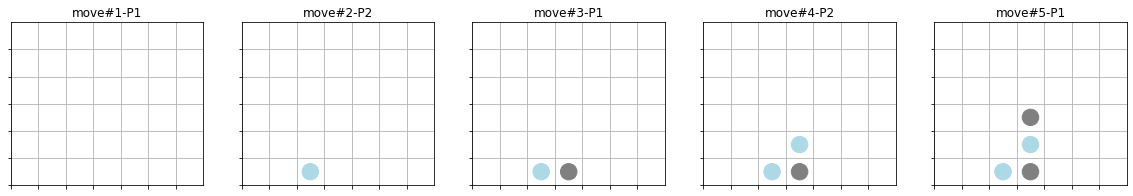

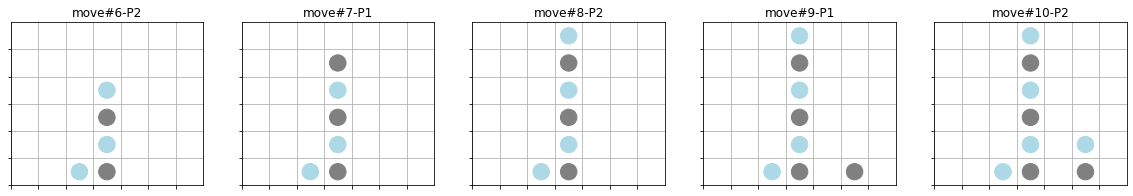

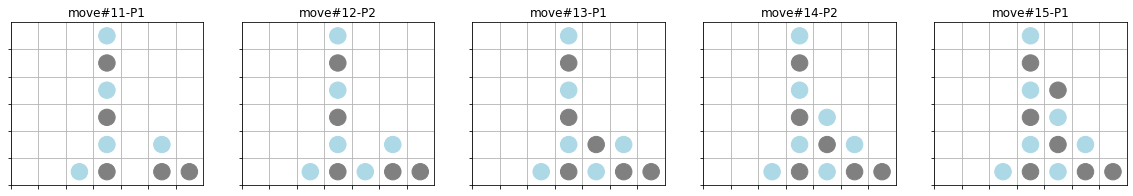

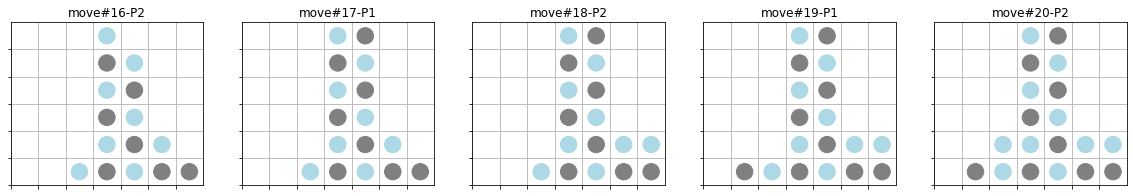

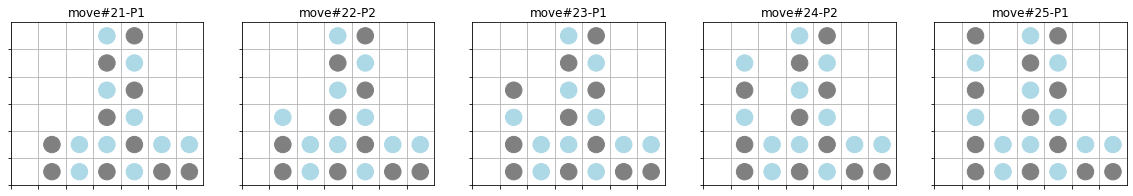

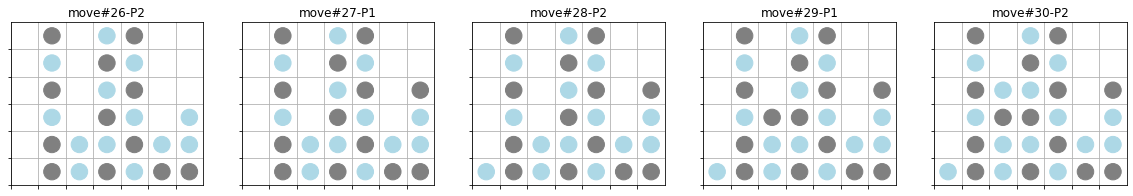

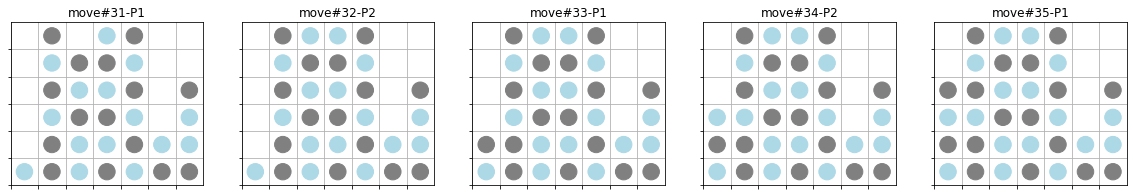

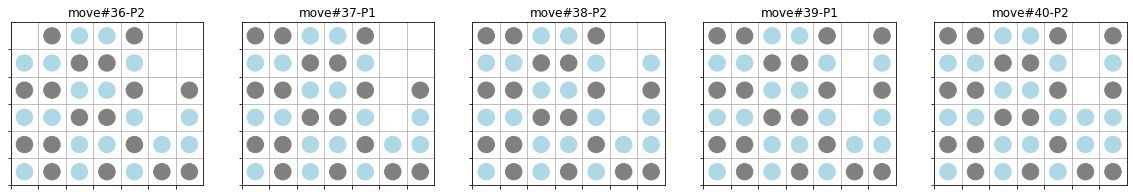

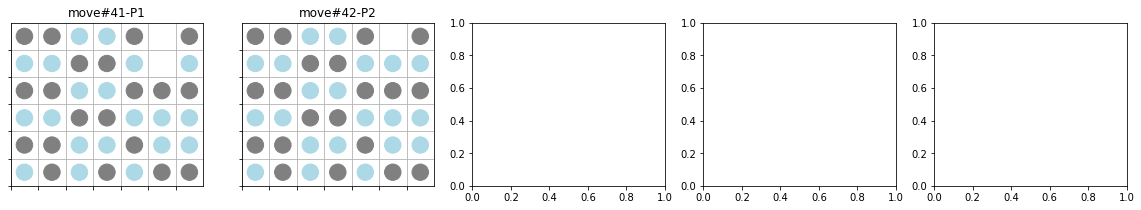

In [617]:
data = p4.train.consolidate_selfplay_from_pickle('data/gen9_400_1-10-01.pkl')

# get all starting positions
starts = np.where(np.abs(data['input_boards']).sum(axis=1).sum(axis=1)==0)[0]

N = 5
i = 0

i = np.random.choice(len(starts)-1)

input_boards = data['input_boards'][starts[i]:starts[i+1],:,:]
input_players = data['input_next_to_move'][starts[i]:starts[i+1]]
for i, (board, player) in enumerate(zip(input_boards, input_players)):
    if i % N == 0:
        fig, ax = plt.subplots(1, N,figsize=(N * 4,3))
    state = p4.game.ConnectFourGameState(board=board, player=player)
    p4.render.renderConnectFour(state, ax=ax[i % N])
    ax[i % N].set_title(f"move#{i+1}-P{0.5*state.next_to_move+1.5:.0f}")


build_model
To see model details, enter:
	>>> <pvn>.summary()


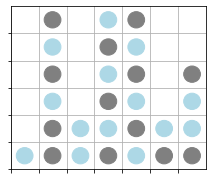

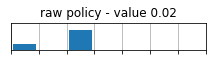

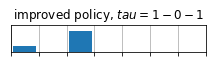

In [636]:
reload(p4.render)
b = np.array(
    [[ 0, 1, 0,-1, 1, 0, 0],
     [ 0,-1, 0, 1,-1, 0, 0],
     [ 0, 1, 0,-1, 1, 0, 1],
     [ 0,-1, 0, 1,-1, 0,-1],
     [ 0, 1,-1,-1, 1,-1,-1],
     [-1, 1,-1, 1,-1, 1, 1]])

state = p4.game.ConnectFourGameState(board=b, next_to_move=1)

pvn_fname = 'models/gen9.h5'
p4.render.visualize_policy_improvement(state, pvn_fname, tau=1, n_sims=100)

build_model
To see model details, enter:
	>>> <pvn>.summary()


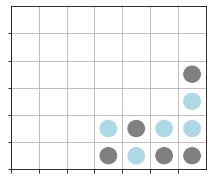

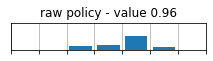

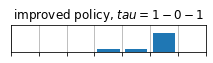

In [639]:
reload(p4.render)
b = np.array(
    [[ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 1],
     [ 0, 0, 0, 0, 0, 0,-1],
     [ 0, 0, 0,-1, 1,-1,-1],
     [ 0, 0, 0, 1,-1, 1, 1]])

state = p4.game.ConnectFourGameState(board=b, next_to_move=1)

pvn_fname = 'models/gen9.h5'
p4.render.visualize_policy_improvement(state, pvn_fname, tau=1, n_sims=400)

# visualize effect of policy improvement

build_model
To see model details, enter:
	>>> <pvn>.summary()


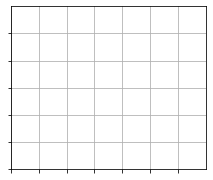

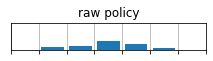

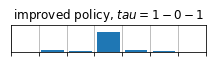

In [552]:
reload(p4.render)
b = np.array(
    [[ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0]])

state = p4.game.ConnectFourGameState(board=b, next_to_move=1)

pvn_fname = 'models/gen9.h5'
p4.render.visualize_policy_improvement(state, pvn_fname, tau=1, n_sims=400)

build_model
To see model details, enter:
	>>> <pvn>.summary()


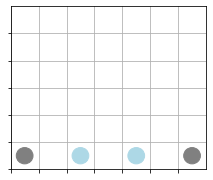

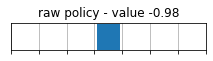

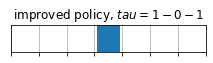

In [641]:
reload(p4.render)
b = np.array(
    [[ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 1, 0,-1, 0,-1, 0, 1]])

state = p4.game.ConnectFourGameState(board=b, next_to_move=-1)

pvn_fname = 'models/gen9.h5'
p4.render.visualize_policy_improvement(state, pvn_fname, tau=1, n_sims=100)

build_model
To see model details, enter:
	>>> <pvn>.summary()


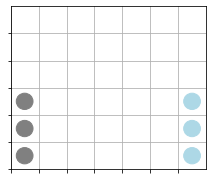

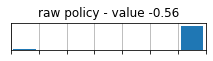

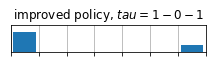

In [651]:
reload(p4.render)
b = np.array(
[[ 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0],
 [ 1, 0, 0, 0, 0, 0, -1],
 [ 1, 0, 0, 0, 0, 0, -1],
 [ 1, 0, 0, 0, 0, 0, -1]])

state = p4.game.ConnectFourGameState(board=b, next_to_move=1)

pvn_fname = 'models/gen9.h5'
p4.render.visualize_policy_improvement(state, pvn_fname, tau=1, n_sims=100)

build_model
To see model details, enter:
	>>> <pvn>.summary()


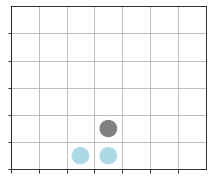

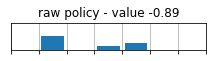

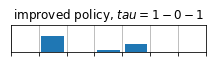

In [656]:
reload(p4.render)
b = np.array(
    [[ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 0, 1, 0, 0, 0],
     [ 0, 0,-1,-1, 0, 0, 0]])

state = p4.game.ConnectFourGameState(board=b, next_to_move=-1)

pvn_fname = 'models/gen9.h5'
p4.render.visualize_policy_improvement(state, pvn_fname, tau=1, n_sims=100)

## NEXT STEPS
- [ ] remove evaluator
- [ ] store history?
- [ ] create cycle manager
- [ ] create player vs human to compete against
- [ ] clean up notebook

# OLD

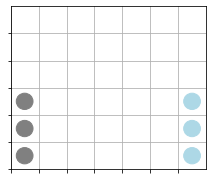

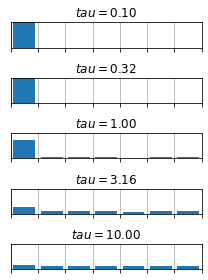

In [5]:
board = np.array(
[[0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [1,0,0,0,0,0,-1],
 [1,0,0,0,0,0,-1], 
 [1,0,0,0,0,0,-1]])

# define state
state = p4.game.ConnectFourGameState(board, 1)
# render state
p4.render.renderConnectFour(state)


# plot policy, for different tau
n = 5
fig, ax = plt.subplots(5,1, figsize=(3,4))
for tau, axi in zip(np.logspace(-1,1,n), ax):
    config = p4.selfplay.SelfPlayConfig(evaluator=gen1, tau=tau, n_sims=100)
    p4.render.render_improved_policy(state, config, axi)
plt.tight_layout()



CPU times: user 2.76 s, sys: 93.9 ms, total: 2.86 s
Wall time: 2.64 s


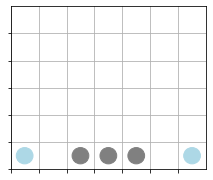

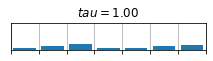

In [14]:
board = np.array(
[[0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0], 
 [-1,0,1,1,1,0,-1]])

# define state
state = p4.game.ConnectFourGameState(board, -1)
# render state
p4.render.renderConnectFour(state)

# render policy
config = p4.selfplay.SelfPlayConfig(evaluator=gen0, tau=1, n_sims=400)
%time p4.render.render_improved_policy(state, config)




In [39]:
probs, values = pvn.model.predict(np.expand_dims(np.expand_dims(state.board, axis=-1), axis=0))
probs[0], values[0][0]

(array([0.08020029, 0.12404051, 0.11309713, 0.1585523 , 0.1693534 ,
        0.09670363, 0.2580527 ], dtype=float32), 0.11572561)

In [60]:
hist = np.array([state.board.reshape(pvn.n, pvn.m, 1) * state.next_to_move for _ in range(5)])
pvn.model.predict(hist)

[array([[0.09479225, 0.22480837, 0.1637778 , 0.11269633, 0.12187588,
         0.1667841 , 0.11526528],
        [0.09479225, 0.22480837, 0.1637778 , 0.11269633, 0.12187588,
         0.1667841 , 0.11526528],
        [0.09479225, 0.22480837, 0.1637778 , 0.11269633, 0.12187588,
         0.1667841 , 0.11526528],
        [0.09479225, 0.22480837, 0.1637778 , 0.11269633, 0.12187588,
         0.1667841 , 0.11526528],
        [0.09479225, 0.22480837, 0.1637778 , 0.11269633, 0.12187588,
         0.1667841 , 0.11526528]], dtype=float32), array([[0.10262141],
        [0.10262141],
        [0.10262141],
        [0.10262141],
        [0.10262141]], dtype=float32)]